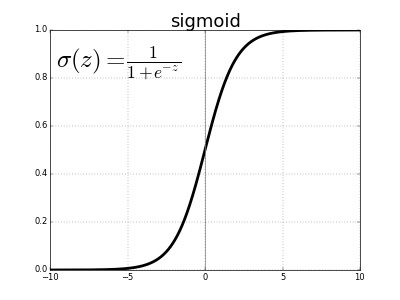

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train = pd.read_csv('titanic_train.csv')

In [3]:
train.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

<AxesSubplot:>

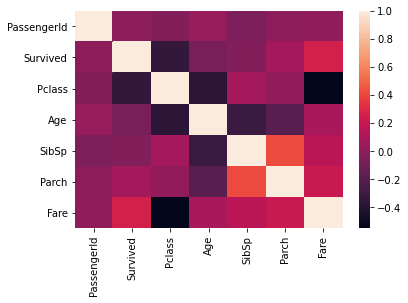

In [4]:
sns.heatmap(train.corr())

<AxesSubplot:>

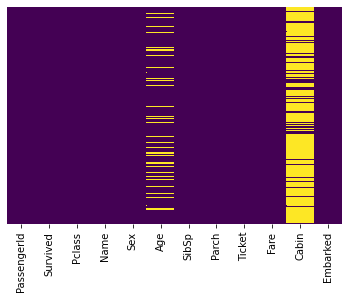

In [5]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [6]:
sns.set_style('whitegrid')

<AxesSubplot:xlabel='Survived', ylabel='count'>

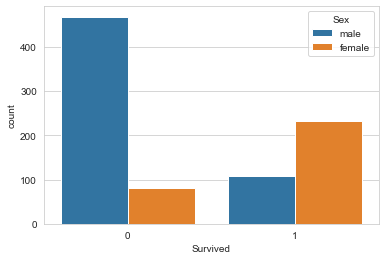

In [7]:
sns.countplot(x='Survived',data=train,hue='Sex')

<AxesSubplot:xlabel='Survived', ylabel='count'>

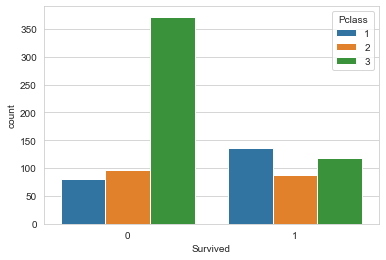

In [8]:
sns.countplot(x='Survived',data=train,hue='Pclass')

C:\ProgramData\Anaconda3\envs\ml\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age'>

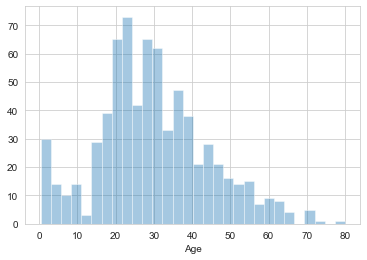

In [9]:
sns.distplot(train['Age'].dropna(),kde=False,bins=30)

In [10]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


<AxesSubplot:xlabel='SibSp', ylabel='count'>

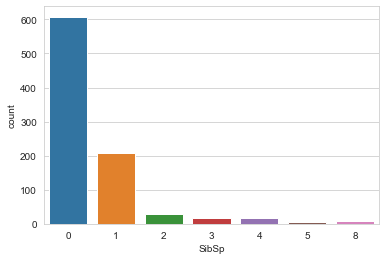

In [11]:
sns.countplot(x='SibSp',data=train)

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

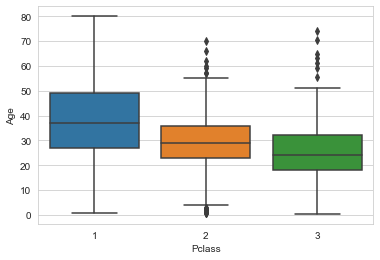

In [12]:
sns.boxplot(x='Pclass',y='Age',data=train)

<AxesSubplot:>

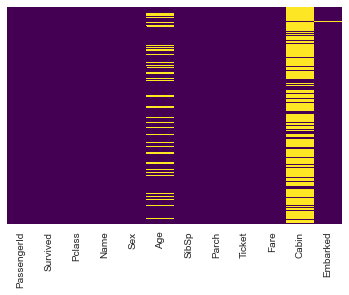

In [13]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [14]:
def impute_age(cols):
    Age = cols[0]
    Pclass=cols[1]
    
    if pd.isnull(Age):
        if  Pclass==1:
            return 37
        elif Pclass ==2:
            return 29
        else:
            return 24
    else:
        return Age

In [15]:
train['Age'] = train[['Age','Pclass']].apply(impute_age,axis=1)

<AxesSubplot:>

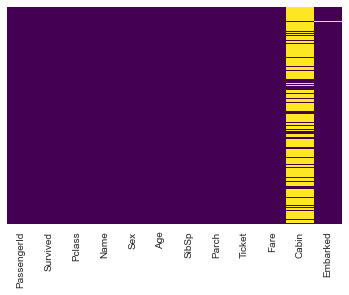

In [16]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [17]:
train.drop('Cabin',axis=1,inplace=True)

<AxesSubplot:>

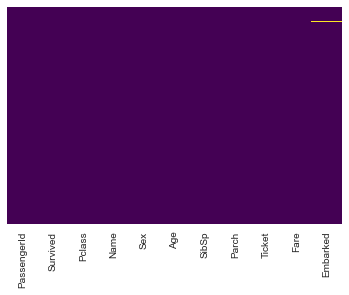

In [18]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [19]:
train.dropna(inplace=True)

<AxesSubplot:>

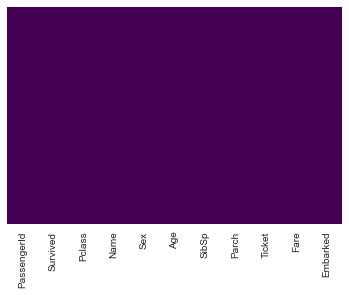

In [20]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [21]:
sex = pd.get_dummies(train['Sex'],drop_first=True)

In [22]:
embark = pd.get_dummies(train['Embarked'],drop_first=True)

In [23]:
train = pd.concat([train,sex,embark],axis=1)

In [24]:
train.drop(['Sex','Embarked'],axis=1,inplace=True)

In [25]:
train.drop(['PassengerId','Name','Ticket'],axis=1,inplace=True)

In [26]:
train.head()

Survived  Pclass   Age  SibSp  Parch     Fare  male  Q  S
0         0       3  22.0      1      0   7.2500     1  0  1
1         1       1  38.0      1      0  71.2833     0  0  0
2         1       3  26.0      0      0   7.9250     0  0  1
3         1       1  35.0      1      0  53.1000     0  0  1
4         0       3  35.0      0      0   8.0500     1  0  1

In [27]:
pclass = pd.get_dummies(train['Pclass'],drop_first=True)

In [28]:
train2 = pd.concat([train,pclass],axis=1)

In [29]:
train2

Survived  Pclass   Age  SibSp  Parch     Fare  male  Q  S  2  3
0           0       3  22.0      1      0   7.2500     1  0  1  0  1
1           1       1  38.0      1      0  71.2833     0  0  0  0  0
2           1       3  26.0      0      0   7.9250     0  0  1  0  1
3           1       1  35.0      1      0  53.1000     0  0  1  0  0
4           0       3  35.0      0      0   8.0500     1  0  1  0  1
..        ...     ...   ...    ...    ...      ...   ... .. .. .. ..
886         0       2  27.0      0      0  13.0000     1  0  1  1  0
887         1       1  19.0      0      0  30.0000     0  0  1  0  0
888         0       3  24.0      1      2  23.4500     0  0  1  0  1
889         1       1  26.0      0      0  30.0000     1  0  0  0  0
890         0       3  32.0      0      0   7.7500     1  1  0  0  1

[889 rows x 11 columns]

In [30]:
train2.drop(['Pclass'],axis=1,inplace=True)

In [41]:
train2

Survived   Age  SibSp  Parch     Fare  male  Q  S  2  3
0           0  22.0      1      0   7.2500     1  0  1  0  1
1           1  38.0      1      0  71.2833     0  0  0  0  0
2           1  26.0      0      0   7.9250     0  0  1  0  1
3           1  35.0      1      0  53.1000     0  0  1  0  0
4           0  35.0      0      0   8.0500     1  0  1  0  1
..        ...   ...    ...    ...      ...   ... .. .. .. ..
886         0  27.0      0      0  13.0000     1  0  1  1  0
887         1  19.0      0      0  30.0000     0  0  1  0  0
888         0  24.0      1      2  23.4500     0  0  1  0  1
889         1  26.0      0      0  30.0000     1  0  0  0  0
890         0  32.0      0      0   7.7500     1  1  0  0  1

[889 rows x 10 columns]

In [32]:
X = train.drop('Survived',axis=1)
y = train['Survived']

In [33]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [36]:
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression(max_iter=1000)

In [37]:
logmodel.fit(X_train,y_train)

LogisticRegression(max_iter=1000)

In [38]:
predictions = logmodel.predict(X_test)

In [39]:
from sklearn.metrics import classification_report
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.82      0.92      0.87       163
           1       0.85      0.69      0.76       104

    accuracy                           0.83       267
   macro avg       0.84      0.81      0.82       267
weighted avg       0.83      0.83      0.83       267



In [40]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,predictions))

[[150  13]
 [ 32  72]]


In [42]:
X = train2.drop('Survived',axis=1)
y = train2['Survived']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression(max_iter=1000)
logmodel.fit(X_train,y_train)
predictions = logmodel.predict(X_test)
from sklearn.metrics import classification_report
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.82      0.92      0.87       163
           1       0.85      0.68      0.76       104

    accuracy                           0.83       267
   macro avg       0.83      0.80      0.81       267
weighted avg       0.83      0.83      0.82       267

